<a href="https://colab.research.google.com/github/anasabbad/Bike-Sharing-Demand-Prediction--Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing Libraries and Loading the data set**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the data
data= pd.read_csv('/content/drive/MyDrive/Capstone Projects/BikeSharingDemandPrediction_Capstone/SeoulBikeData (1).csv').replace([np.inf, -np.inf], np.nan)

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
data.shape

(8760, 14)

In [7]:
#renaming the column names
data.rename(columns = {'Rented Bike Count':'Rented_Bike_Count'}, inplace = True)
data.rename(columns = {'Rainfall(mm)':'Rainfall'}, inplace = True)
data.rename(columns = {'Temperature(°C)':'Temperature'}, inplace = True)
data.rename(columns = {'Humidity(%)':'Humidity'}, inplace = True)
data.rename(columns = {'Wind speed (m/s)':'Wind_Speed'}, inplace = True)
data.rename(columns = {'Visibility (10m)':'Visibility'}, inplace = True)
data.rename(columns = {'Solar Radiation (MJ/m2)':'Solar_Radiation'}, inplace = True)
data.rename(columns = {'Snowfall (cm)':'Snowfall'}, inplace = True)
data.rename(columns = {'Functioning Day':'Functioning_Day'}, inplace = True)

In [8]:
# total count of missing values column wise
data.isnull().sum()

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature                  0
Humidity                     0
Wind_Speed                   0
Visibility                   0
Dew point temperature(°C)    0
Solar_Radiation              0
Rainfall                     0
Snowfall                     0
Seasons                      0
Holiday                      0
Functioning_Day              0
dtype: int64

We can see that there are no missing values.

In [9]:
data.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented_Bike_Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature                8760 non-null   float64
 4   Humidity                   8760 non-null   int64  
 5   Wind_Speed                 8760 non-null   float64
 6   Visibility                 8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar_Radiation            8760 non-null   float64
 9   Rainfall                   8760 non-null   float64
 10  Snowfall                   8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning_Day            8760 non-null   objec

In [11]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [12]:
# Adding a new column for Month in the dataFrame
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [13]:
#Change the int64 column into catagory column
cols=['Hour','Month',]
for col in cols:
  data[col]=data[col].astype('object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented_Bike_Count          8760 non-null   int64  
 2   Hour                       8760 non-null   object 
 3   Temperature                8760 non-null   float64
 4   Humidity                   8760 non-null   int64  
 5   Wind_Speed                 8760 non-null   float64
 6   Visibility                 8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar_Radiation            8760 non-null   float64
 9   Rainfall                   8760 non-null   float64
 10  Snowfall                   8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning_Day            8760 non-null   objec

# **Handling Outliers**

<Figure size 504x504 with 0 Axes>

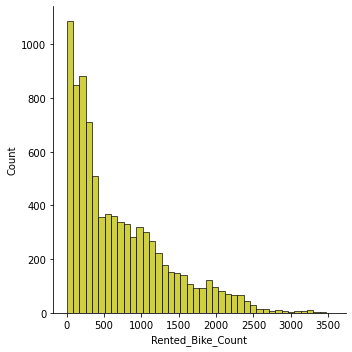

In [15]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.displot(data['Rented_Bike_Count'],color="y")

In [16]:
# Replace infinite updated data with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data.dropna(inplace=True)


In [17]:
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))
data['Rented_Bike_Count'] = data['Rented_Bike_Count'].apply(round_int)

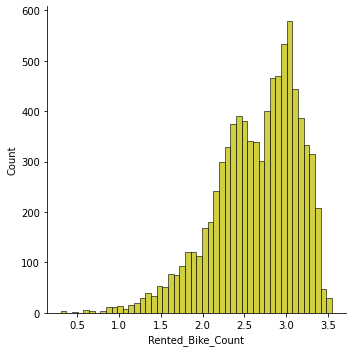

In [18]:

ax=sns.displot(np.log10(data['Rented_Bike_Count']), color="y")
plt.show()

In [19]:
data['Rented_Bike_Count_log'] = np.log2(data['Rented_Bike_Count'])

In [20]:
data['Rented_Bike_Count_log'] .describe()

count    8760.000000
mean            -inf
std              NaN
min             -inf
25%         7.577429
50%         8.978710
75%        10.056976
max        11.796040
Name: Rented_Bike_Count_log, dtype: float64

So it is better to do a Square Root Transform to avoid the infinity values

In [21]:
data=data.drop('Rented_Bike_Count_log', axis=1)

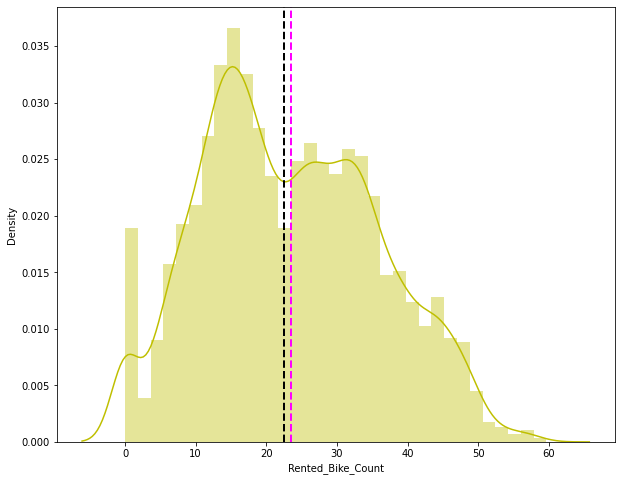

In [22]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(data['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(data['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(data['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

The distribution is much better now. So we can trsnform the Rented_Bike_Count using Square Root Transform

In [23]:
data['Rented_Bike_Count'] = np.sqrt(data['Rented_Bike_Count'])

# **Exploratory Data Analysis & Data Preparation**

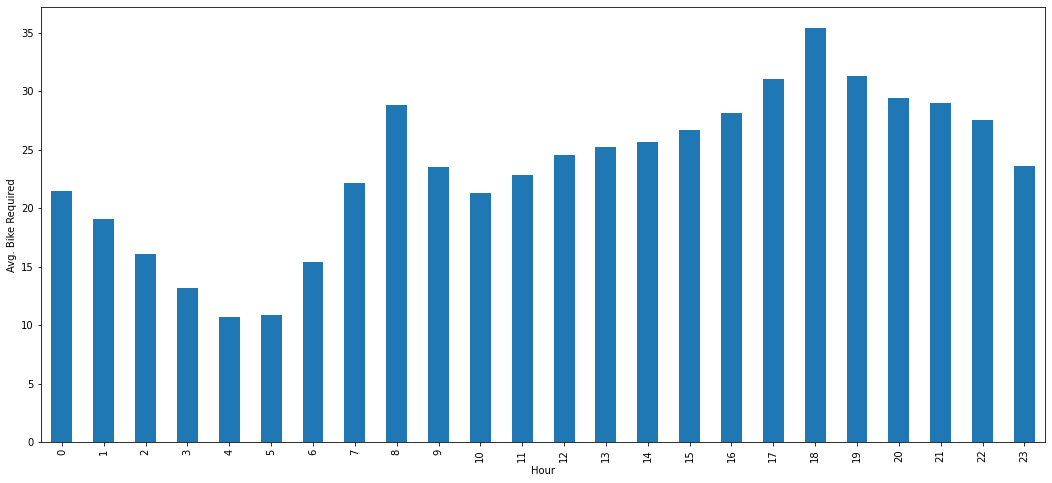

In [24]:
data.groupby('Hour').Rented_Bike_Count.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. Bike Required')
plt.show()

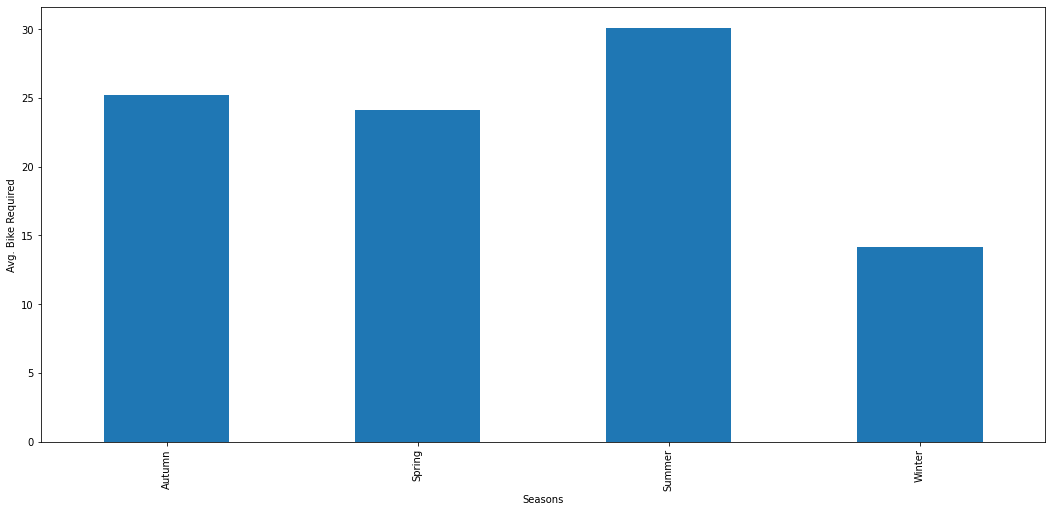

In [25]:
data.groupby('Seasons').Rented_Bike_Count.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. Bike Required')
plt.show()

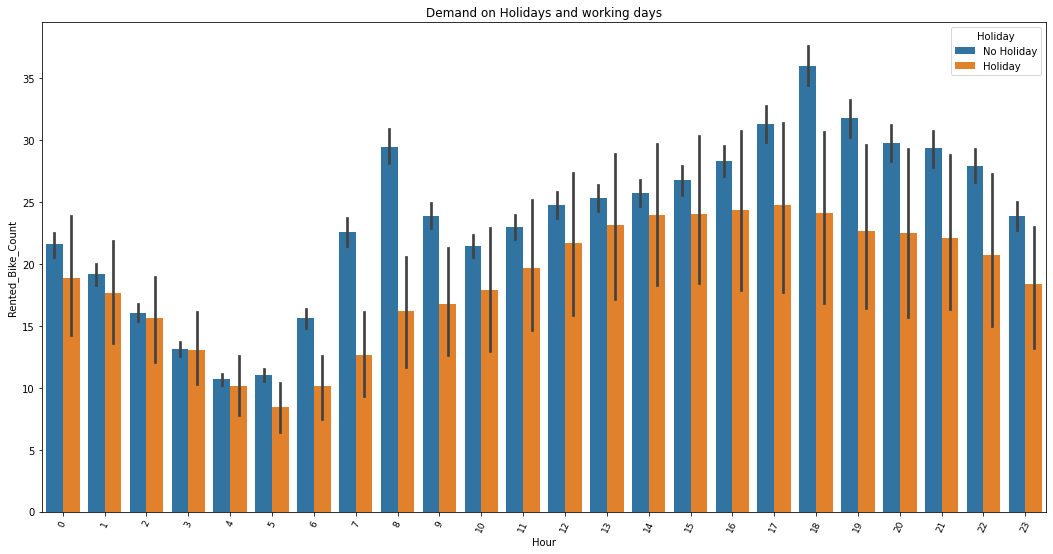

In [26]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Hour")
plt.ylabel("Rented_Bike_Count")
plt.title("Demand on Holidays and working days")
sns.barplot('Hour', 'Rented_Bike_Count', hue='Holiday', data=data);
plt.show()

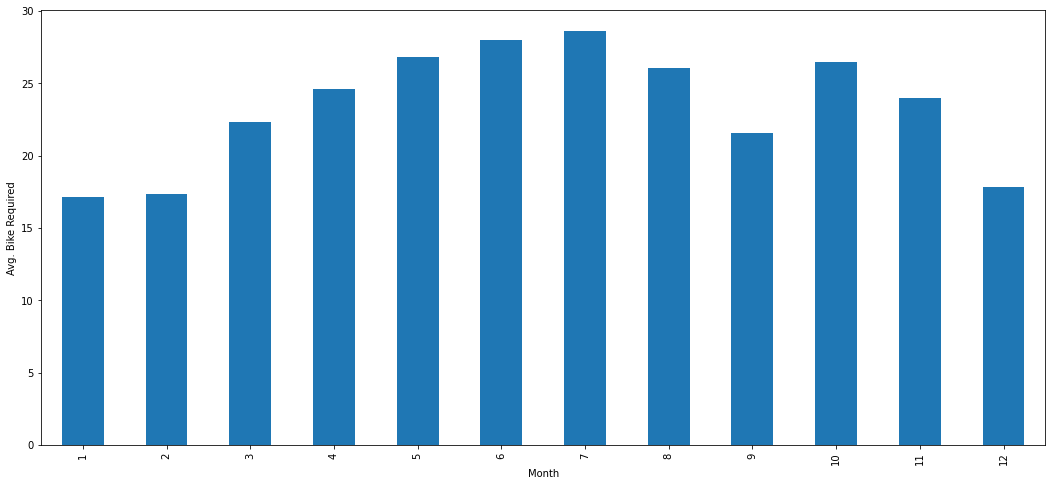

In [27]:
data.groupby('Month').Rented_Bike_Count.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. Bike Required')
plt.show()

**Inferenece:**


* The peak requirement for bikes are during the start and end of office hours
* The Bikes are most used in Summers and Least used during winters
*On holidays the demand is not that as much as that on Working days. But the trend of demand more or less remains the same
* The demand is more during evening compared to morning.
*The Demand for bikes are less during the start and end of the year and the demand grows till June and then shows a decrfeasing trend

In [28]:
numeric_features = data.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew point temperature(°C)', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Month'],
      dtype='object')

In [29]:
 #Draw box plots for indepent variables with continuous values
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [30]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 11 numerical variables


In [31]:
discrete = []
for var in numerical:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

Month  values:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
There are 1 discrete variables


In [32]:
continuous = [var for var in numerical if var not in discrete and var not in ['id','Hour','Rented_Bike_Count']]

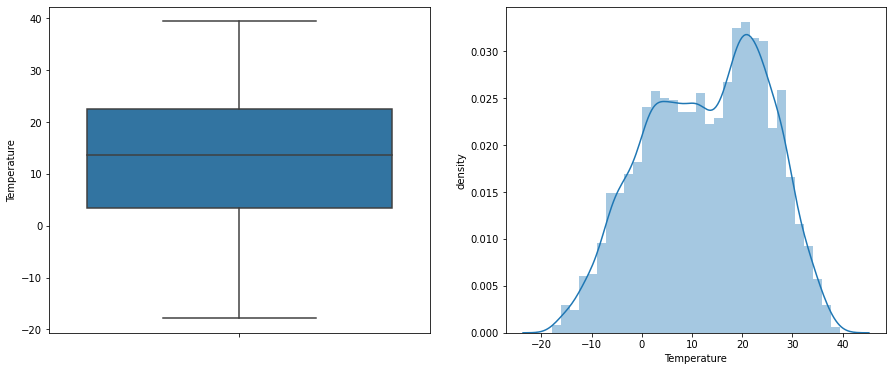

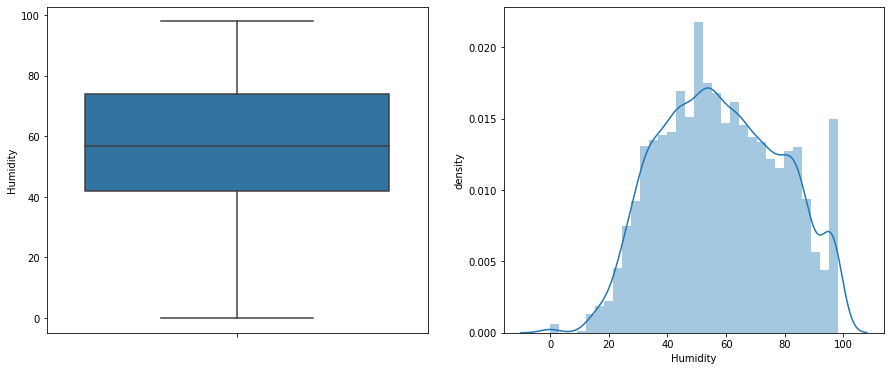

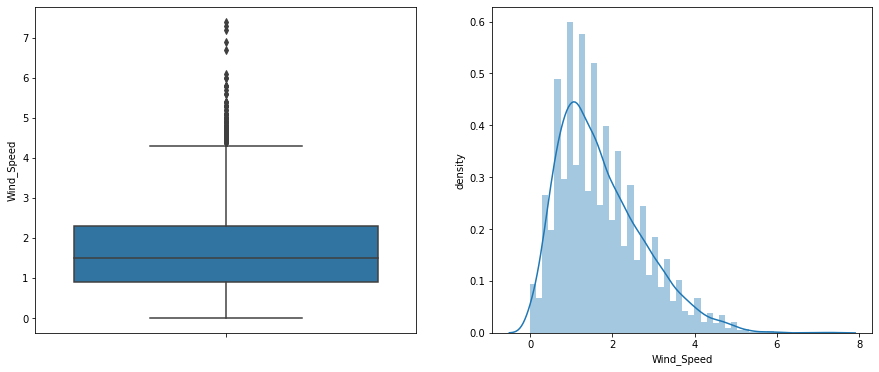

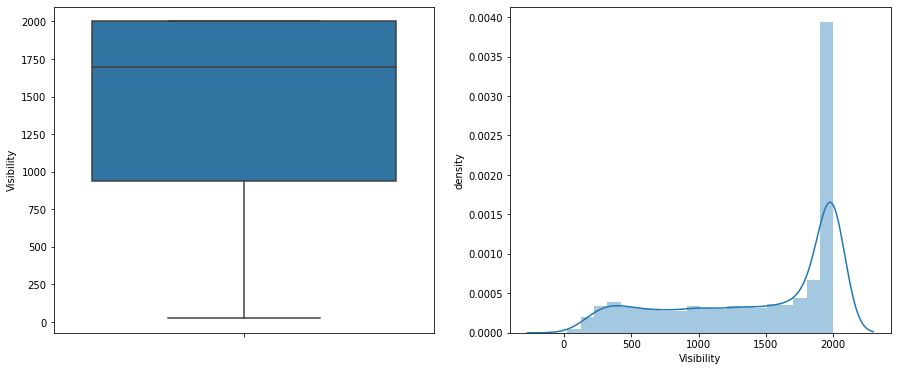

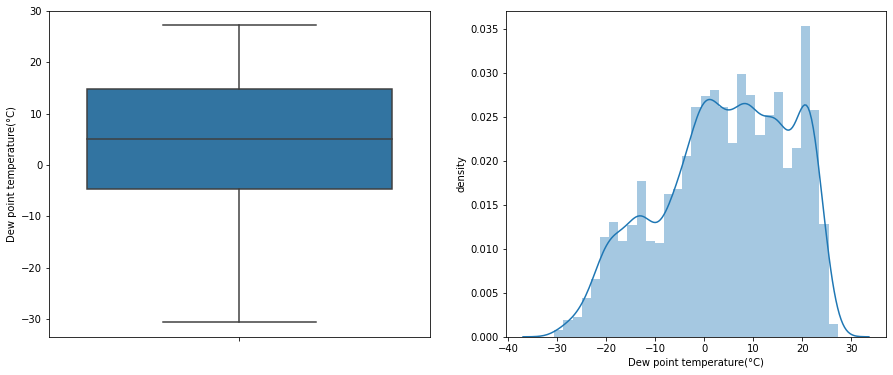

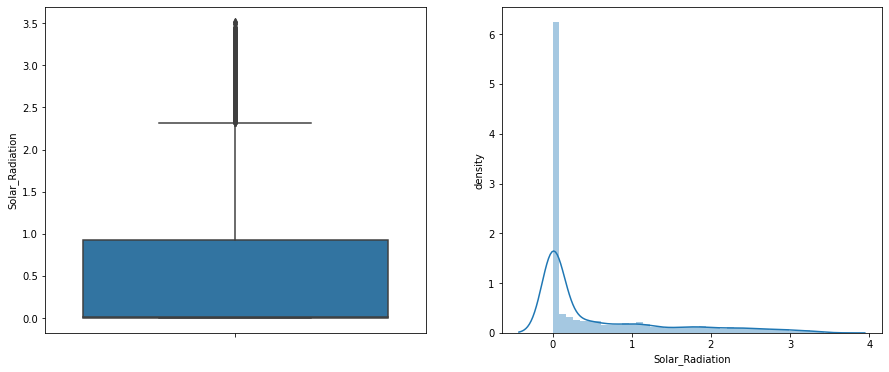

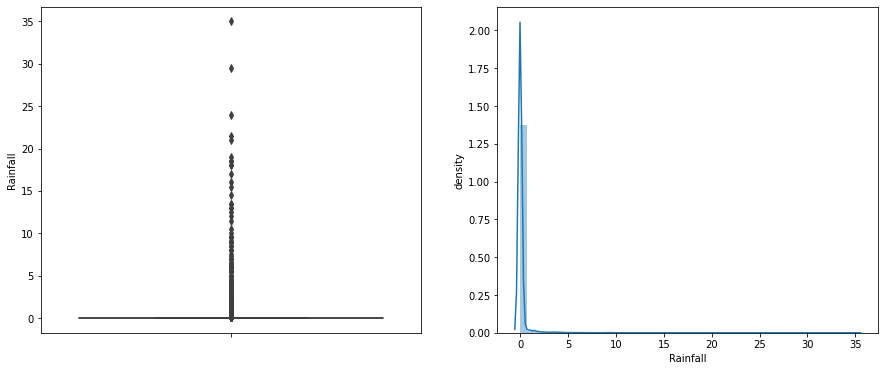

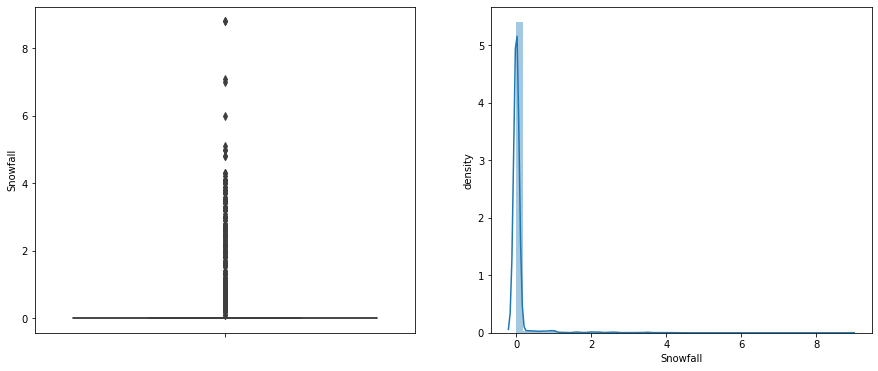

In [33]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('density')
    fig.set_xlabel(var)

    plt.show()

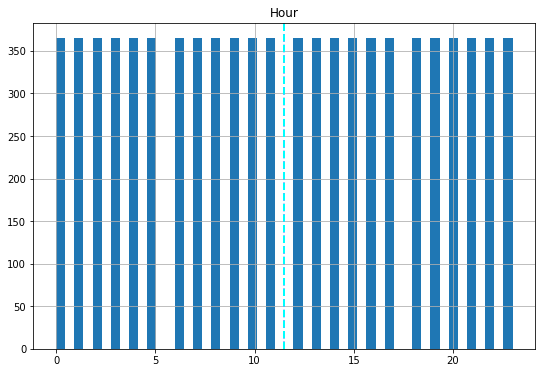

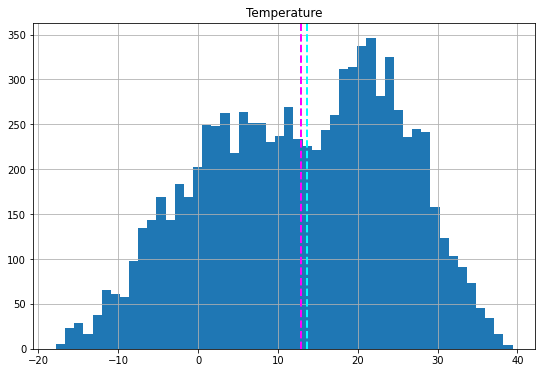

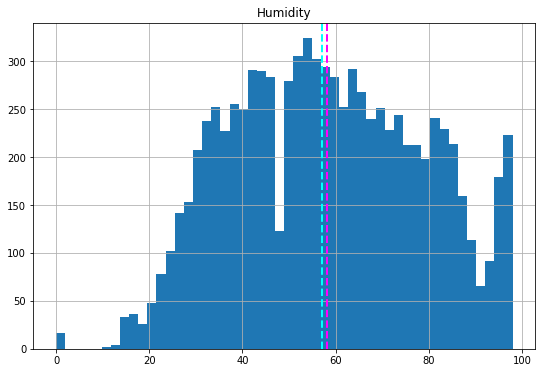

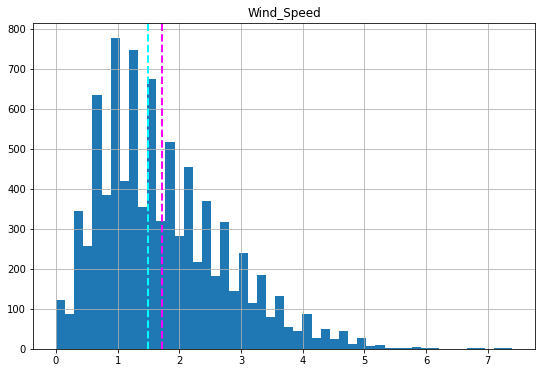

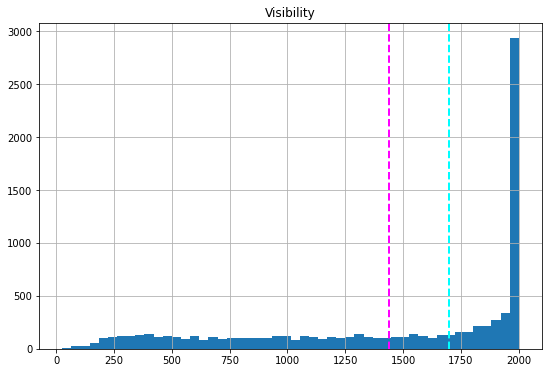

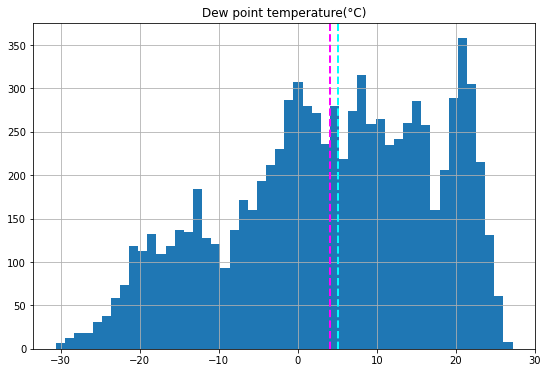

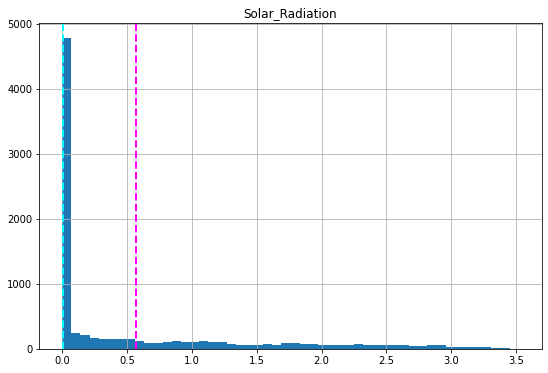

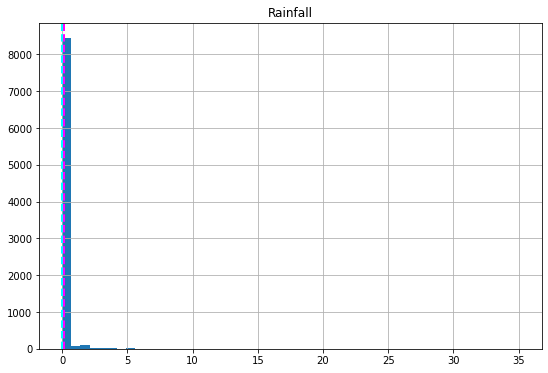

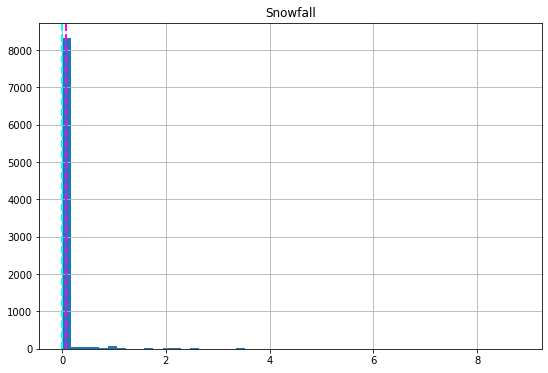

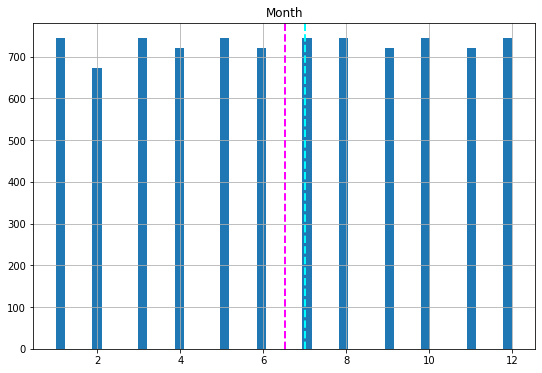

In [34]:
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

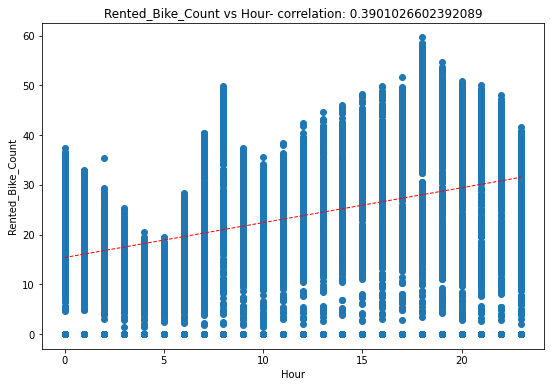

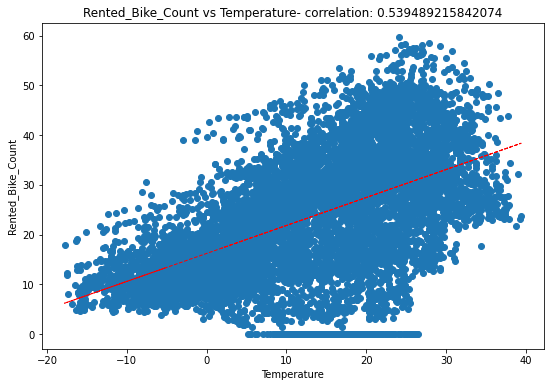

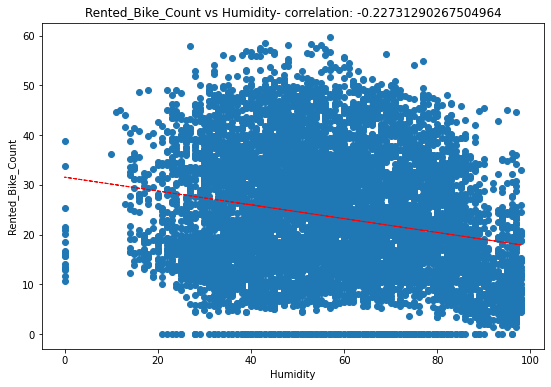

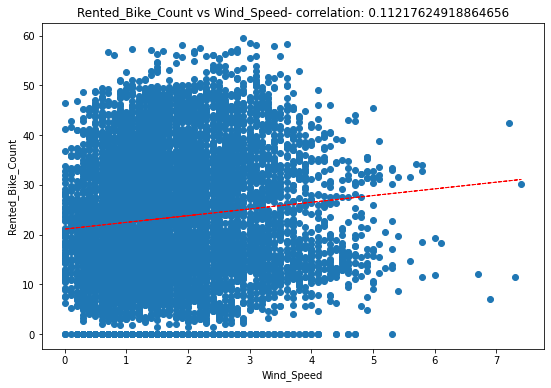

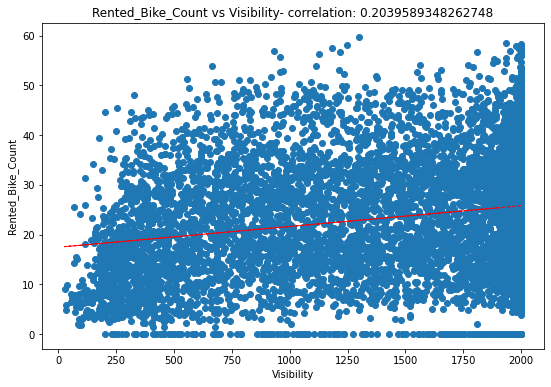

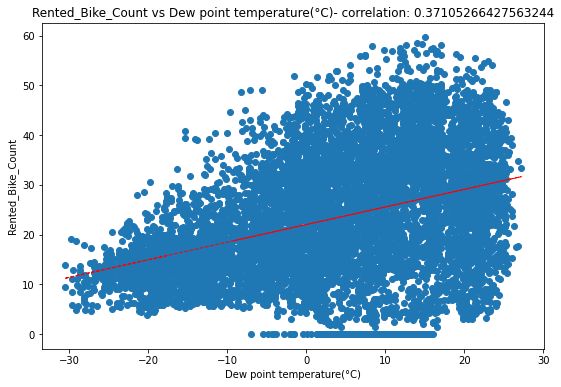

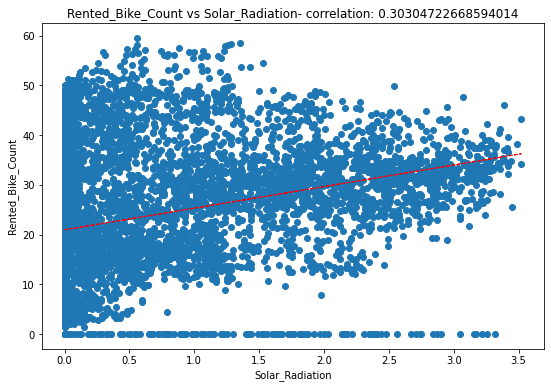

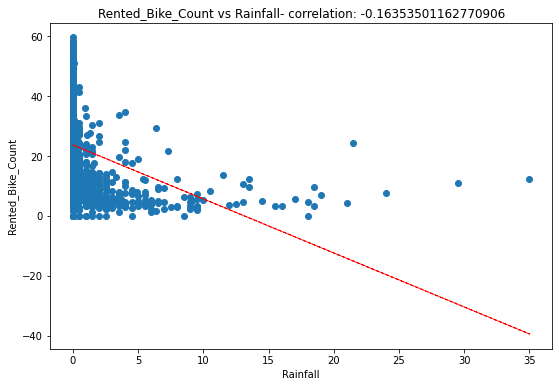

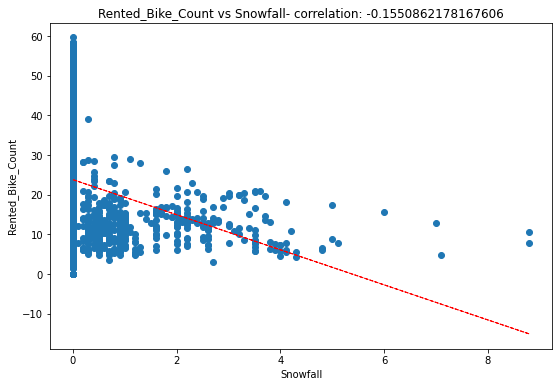

In [35]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

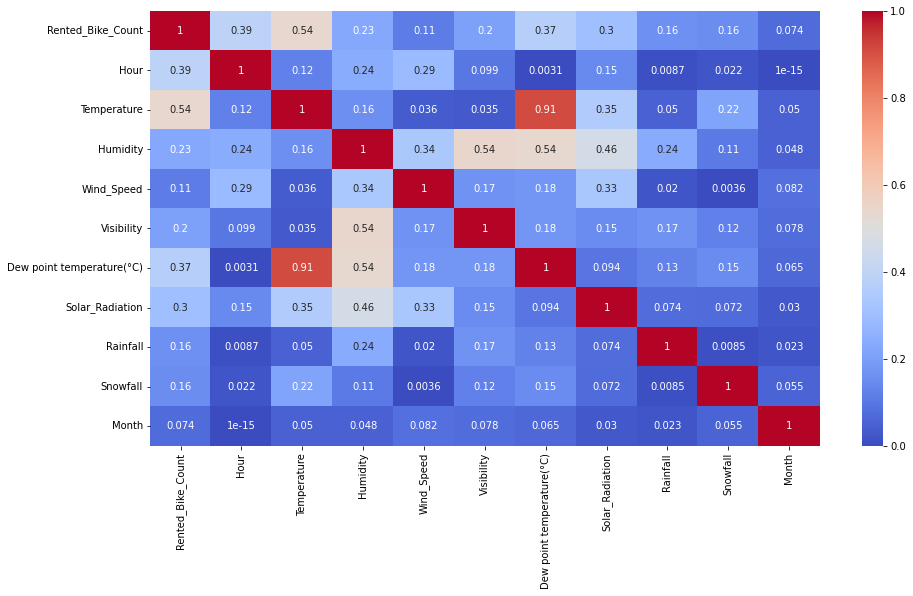

In [36]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Inference: Temperature and Dew Point Temperataure columns are highly correlated. 

In [37]:
data=data.drop(['Dew point temperature(°C)'],axis=1)

In [38]:
#number of unique values in all columns
data.nunique()

Date                  365
Rented_Bike_Count    2166
Hour                   24
Temperature           546
Humidity               90
Wind_Speed             65
Visibility           1789
Solar_Radiation       345
Rainfall               61
Snowfall               51
Seasons                 4
Holiday                 2
Functioning_Day         2
Month                  12
dtype: int64

In [39]:
data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month
0,01-12-2017,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,01-12-2017,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01-12-2017,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,01-12-2017,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,01-12-2017,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1


We can also drop the Date column as we want to predict the demand for bikes on hourly basis based on the conditions

In [40]:
data=data.drop(['Date'],axis=1)

In [41]:
data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month
0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1


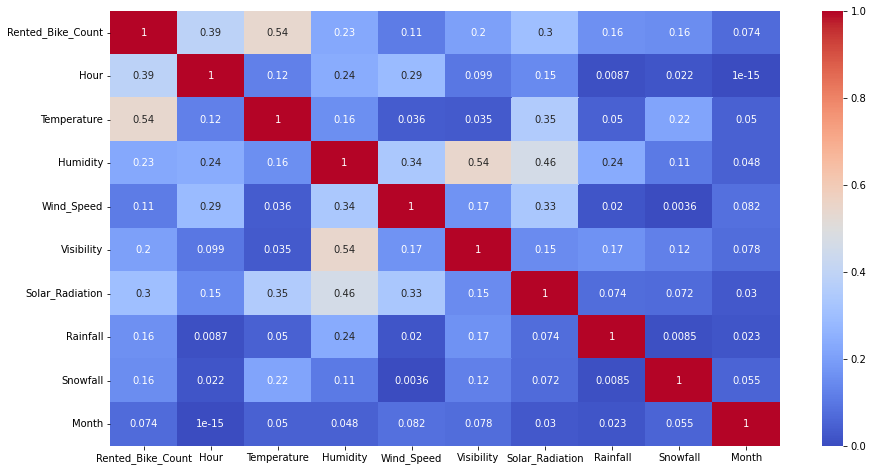

In [42]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [43]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [44]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,3.956097
1,Temperature,3.230202
2,Humidity,6.006861
3,Wind_Speed,4.615739
4,Visibility,5.332471
5,Solar_Radiation,2.265399
6,Rainfall,1.081093
7,Snowfall,1.124563
8,Month,4.577143


In [45]:
data = data.reset_index()

# **Prediction**

In [46]:
data_pred = data.copy()

In [47]:
data_pred['Month']=data_pred['Month'].astype('object')

In [48]:
#Assign all catagoriacla features to a variable
categorical_features=list(data_pred.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day', 'Month'], dtype='object')

# One Hot Encoding

In [49]:

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    data_pred = one_hot_encoding(data_pred, col)
data_pred.head()     

,index,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Get one hot encoding of columns Hour
one_hot = pd.get_dummies(data_pred['Hour'])
# Drop column Hour as it is now encoded
data_pred = data_pred.drop('Hour',axis = 1)
# Join the encoded df
data_pred = data_pred.join(one_hot)
data_pred


,index,Rented_Bike_Count,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons_Spring,...,14,15,16,17,18,19,20,21,22,23
0,0,15.937377,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,14.282857,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,13.152946,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,10.344080,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,8.831761,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,31.670175,4.2,34,2.6,1894,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
8756,8756,27.640550,3.4,37,2.3,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
8757,8757,26.343880,2.6,39,0.3,1968,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
8758,8758,26.683328,2.1,41,1.0,1859,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
data_pred.isnull().any().any()

False

In [52]:
data_pred.reset_index(drop=True, inplace=True)
#y to contain only target variable
y=data_pred.pop('Rented_Bike_Count')

#X is all remainign variable also our independent variables
X=data_pred

In [53]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state = 0)

In [54]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
import sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = regr.predict(X_test)

# Form residual
resid = y_test - y_pred

In [56]:
#get the X_train and X-test value
y_pred_train=regr.predict(X_train)
y_pred_test=regr.predict(X_test)

In [57]:
#Root Mean Squared Error
RMSE = np.sqrt(np.mean(resid**2))
print('The Root Mean Squared Error is',RMSE)
print()

# Mean Absolute Error
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

#Rsquared
R2 = r2_score(y_test, y_pred)
print('The Rsquared value is',R2)

Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Root Mean Squared Error is 6.024341427880892

The Mean Absolute Error is 4.654071102041691

The Rsquared value is 0.7637165239059881
Adjusted R2 : 0.7593188477320786


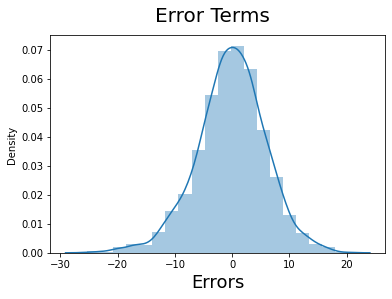

In [58]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((resid),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

# **Model 2- Ridge**

In [59]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [60]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [61]:
#check the score
ridge.score(X_train, y_train)

0.7569917755150655

In [62]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [63]:
#import the packages
resid = y_test - y_pred_test_ridge
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 36.303926967976295
RMSE : 6.025274016007595
R2 : 0.7636433633048381
Adjusted R2 : 0.759244325475692


# Model 3- Lasso

In [64]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.63494712303025 0.6307828202859229


In [65]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)



from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 56.07142312679015
RMSE : 7.4880854112910695
R2 : 0.63494712303025
Adjusted R2 : 0.628152808142872


## Model 4 - ElasticNet

In [67]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [68]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [69]:
#check the score
elasticnet.score(X_train, y_train)

0.7501035124071863

In [70]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [74]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_en= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE_en)

#calculate RMSE
RMSE_en=np.sqrt(MSE_en)
print("RMSE :",RMSE_en)




#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_test, y_pred_test_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.85124545277317
RMSE : 6.152336584808505
R2 : 0.7535695497120154
Adjusted R2 : 0.7489830194236


## Model 5 - Decision Tree Regressor

In [75]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(max_depth=10,random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [76]:
#get the X_train and X-test value
y_pred_train_dt=regressor.predict(X_train)
y_pred_test_dt=regressor.predict(X_test)

In [77]:
# Mean Absolute Error
resid=y_test-y_pred_test_dt
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

MSE_l= mean_squared_error((y_test), (y_pred_test_dt))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#Rsquared
R2 = r2_score(y_test, y_pred_test_dt)
print('The Rsquared value is',R2)

Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error is 4.2213621300504816

MSE : 35.74118069520195
RMSE : 5.978392818743341
The Rsquared value is 0.767307121676295
Adjusted R2 : 0.7629762732235854


## Model 5 - Random Forest Regressor

In [78]:
# Create the parameter grid based on the results of random search 
#param_grid = {
#    'bootstrap': [True],
 #   'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
 #   'min_samples_split': [8, 10, 12],
 #   'n_estimators': [100, 200, 300, 1000]}
 #from running thye above gridsearch it was found that the best parameteters are the below ones

#best_params={'bootstrap': True,
# 'max_depth': 90,
# 'max_features': 3,
 #'min_samples_leaf': 3,
# 'min_samples_split': 8,
# 'n_estimators': 1000}
# Create a based model
#rf = RandomForestRegressor()
# Instantiate the grid search model
#rf_grid = GridSearchCV(estimator = rf, param_grid = best_params, 
#                          cv = 3, n_jobs = -1, verbose = 2)

#rf_grid.fit(X_train,y_train)

In [79]:
rf_optimal_model = RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [80]:
#FIT THE MODEL
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [81]:
rf_train_preds = rf_optimal_model.predict(X_train)
rf_test_preds = rf_optimal_model.predict(X_test)

In [82]:
# Mean Absolute Error
resid= y_test-rf_test_preds
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

MSE_l= mean_squared_error((y_test), (rf_test_preds))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#Rsquared
R2 = r2_score(y_test, rf_test_preds)
print('The Rsquared value is',R2)

Adjusted_R2_lr = (1-(1-r2_score(y_test, rf_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, rf_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error is 4.079153330746524

MSE : 28.54534781172718
RMSE : 5.342784649574337
The Rsquared value is 0.8141555758410141
Adjusted R2 : 0.8106966644956742


## Model 6 - XGB Regressor

In [83]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = XGBRegressor(seed = 20)
xgbr_grid = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

In [84]:
#xgbr_grid.fit(X_train,y_train)

In [85]:
xgb_optimal_model = XGBRegressor(colsample_bytree=0.7, max_depth=6, n_estimators=500, seed=20)

In [86]:
xgb_optimal_model.fit(X_train,y_train)

[16:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, max_depth=6, n_estimators=500, seed=20)

In [87]:
xgb_train_preds = xgb_optimal_model.predict(X_train)
xgb_test_preds = xgb_optimal_model.predict(X_test)

In [90]:
# Mean Absolute Error
resid=y_test-xgb_test_preds
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

MSE_xgb= mean_squared_error((y_test), (xgb_test_preds))
print("MSE :",MSE_xgb)

#calculate RMSE
RMSE_xgb=np.sqrt(MSE_xgb)
print("RMSE :",RMSE_xgb)

#Rsquared
R2 = r2_score(y_test, xgb_test_preds)
print('The Rsquared value is',R2)

Adjusted_R2_lr = (1-(1-r2_score(y_test, xgb_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, xgb_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error is 2.440453553132194

MSE : 13.368366182853302
RMSE : 3.6562776402857184
The Rsquared value is 0.9129652813626548
Adjusted R2 : 0.9113454029234952


In [89]:
fea_df = pd.DataFrame({'Feature': independent, 'Feature importance': xgb_optimal_model.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

NameError: ignored